# СОДЕРЖАНИЕ

- Из общей информации
- Бизнес задача
- Детализация задач
- Информация о данных
- Требования к работе
- Получениие данных
- Предобработка данных
    - Начальная. Понятие физ. сущностей
    - Предобработка данных. Манипуляции
- ...

# Из Общей Информации

Форматы рекламы в мобильных играх:
- int – полноэкранная реклама; 
- banner – горизонтальный баннер, висит внизу экрана пока юзер играет;
- rv – видео, которое юзер смотрит по желанию и за просмотр получает монетки или др. ресурсы.

eCPM – доход за 1000 показов рекламы.

# Бизнес Задача

Провести исследование показов рекламы с целью понять на сколько отличается eCPM в зависимости от географии (города) юзера, версии ОС и других параметров.

Этот csv файл (544,4 Mb) содержит информацию о показах рекламы для юзеров США:
https://drive.google.com/drive/folders/1bjWlzyXV8ALcoxZYrdNQH6_MOm3nS3Pl?usp=sharing

# Детализация Задач

- 1. Для каждого формата рекламы:
    - a. построить распределение средних eCPM-ов юзеров
    - b. построить распределение eCPM-ов по городам, версиям ОС
    - c. построить распределение доходов по городам, версиям ОС
- 2. Учесть статистическую значимость (отобразить, отфильтровать незначимое или хотя бы прокомментировать). Объяснить решение.
- 3. Описать наблюдения и вывод по исследованию.

**Доп.:**

Исследовать:
- 4. Какой процент доходов содержит информацию о городе юзера
- 5. Зависит ли eCPM от времени дня

# Информация о Данных

- Столбец profile_id – id юзера
- Столбец event_json содержит данные о событии показа рекламы:
    - ad_type – формат рекламы (int, banner или rv)
    - placement – когда/где был показ рекламы в игре
    - view_index – номер показа конкретного формата рекламы для юзера (не поддерживается для баннеров)

    - revenue – доход от конкретного показа рекламы (eCPM = revenue * 1000)
    - ads_ltv – накапливающийся доход от рекламы, равен сумме всех revenue юзера
    - network_name – рекламная сеть, от которой был показ

# Требования к Работе

- Понятная визуализация данных, грамотный выбор средств для презентации данных (типы диаграмм, таблиц или др.)
- Чистотый и понятный код
- Описание наблюдений в процессе иследования и выводы

# Получение данных

In [111]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
# неудачная попытка загрузки данных, т.к. файл очень большой вместо стандартного начала загрузки
# гугл отправляет на страницу, где просит подтвердить скачивание (см. скрин окна подтверждения ниже)
url='https://drive.google.com/file/d/1h2eXP4EyL8hYT2kZ0wmShAtp8Qz8HpNq/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
'''

"\n# неудачная попытка загрузки данных, т.к. файл очень большой вместо стандартного начала загрузки\n# гугл отправляет на страницу, где просит подтвердить скачивание (см. скрин окна подтверждения ниже)\nurl='https://drive.google.com/file/d/1h2eXP4EyL8hYT2kZ0wmShAtp8Qz8HpNq/view?usp=sharing'\nurl='https://drive.google.com/uc?id=' + url.split('/')[-2]\ndf = pd.read_csv(url)\n"

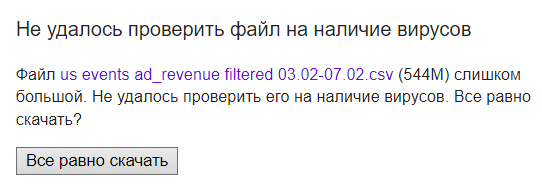

Я скачал файл на свой ПК; в репозиторий клонировать его не буду; открою локально для анализа, дальнейшей работы.

In [124]:
path = '../../../6_database/us events ad_revenue filtered 03.02-07.02.csv'
df = pd.read_csv(path)

In [125]:
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


Данные открыты. Посмотрим на изначальные вид и структуру

# Предобработка данных

## Начальная. Понятие физ. сущностей

In [5]:
df.shape

(860079, 16)

In [6]:
df.dtypes

profile_id                 object
os_version                 object
device_manufacturer        object
device_model               object
device_type                object
device_locale              object
event_name                 object
event_json                 object
event_datetime             object
event_timestamp             int64
event_receive_datetime     object
event_receive_timestamp     int64
connection_type            object
operator_name              object
country_iso_code           object
city                       object
dtype: object

In [7]:
k=0
print('COLUMNS')
for i in df.columns:
    if i == 'profile_id': 
        k+=1
        print(f'{str(k)}) {i} - id пользователя')
    elif i == 'event_json':
        k+=1
        print(f'{str(k)}) {i} - содержит данные:')
        print('''    - ad_type      – формат рекламы (int [полноэкранная], banner или rv [по желанию])
    - placement    – когда/где был показ рекламы в игре
    - view_index   – номер показа конкретного формата рекламы для юзера (не поддерживается для баннеров)
    - revenue      – доход от конкретного показа рекламы (eCPM = revenue * 1000)
    - ads_ltv      – накапливающийся доход от рекламы, равен сумме всех revenue юзера
    - network_name – рекламная сеть, от которой был показ''')
    else:
        k+=1
        print(f'{str(k)}) {i}')
        

COLUMNS
1) profile_id - id пользователя
2) os_version
3) device_manufacturer
4) device_model
5) device_type
6) device_locale
7) event_name
8) event_json - содержит данные:
    - ad_type      – формат рекламы (int [полноэкранная], banner или rv [по желанию])
    - placement    – когда/где был показ рекламы в игре
    - view_index   – номер показа конкретного формата рекламы для юзера (не поддерживается для баннеров)
    - revenue      – доход от конкретного показа рекламы (eCPM = revenue * 1000)
    - ads_ltv      – накапливающийся доход от рекламы, равен сумме всех revenue юзера
    - network_name – рекламная сеть, от которой был показ
9) event_datetime
10) event_timestamp
11) event_receive_datetime
12) event_receive_timestamp
13) connection_type
14) operator_name
15) country_iso_code
16) city


Посмотрим на данные в колонке event_json

In [8]:
json.loads(df.event_json[0])

{'ad_type': 'banner',
 'placement': '',
 'view_index': 1,
 'session_view_index': 0,
 'cur_ticks': 637795729492245130,
 'session_length': 705.8807,
 'revenue': 0.000510313,
 'ads_ltv': 0.487876676518837,
 'ecpm_sma': 0.511508107185364,
 'normalized_ecpm_sma': 0.511508107185364,
 'value': 0.000510313,
 'currency': 'USD',
 'ad_country_code': 'US',
 'network_name': 'Google AdMob',
 'ad_unit_id': '64c6b1114ea8c1cc',
 'ad_network_placement': 'ca-app-pub-7511632782617496/8825263691',
 'creativeId': 'CJ3XirfD5vUCFYPnKAUdG3MOYQ'}

Исследуем данные по каждой колонке, чтобы убедиться, что у нас все выгрузилось правильно, и чтобы "познакомиться" с данными

In [9]:
# 1 - колонка 1
df.profile_id.nunique()  # vs. 860.079 rows in dataset

4226

In [10]:
df.profile_id[0]

'JLjpGzDHBQm'

In [11]:
df.profile_id.dtype

dtype('O')

In [12]:
# 2 - колонка 3
print(df.device_manufacturer.unique())  # all are android-devices?
print(df.device_manufacturer.nunique())

['Samsung' 'Google' 'TCL' 'LG' 'OnePlus' 'Motorola' 'Teracube' 'Lenovo'
 'T-Mobile' 'Verizon Wireless' 'Xiaomi' 'Alcatel' 'Cricket' 'Blu'
 'Kyocera' 'Maxwest' 'Nokia' 'FIH' 'Dish' 'Schok' 'deejoy' 'AT&T' 'Zte'
 'Redmi' 'Yulong' 'Wiko' 'Huawei' 'Onn (Walmart)' 'AEEZO' 'Asus' 'JOYAR'
 'POCO' 'Ulefone' 'Razer']
34


In [13]:
# 3 - колонка 2
print(df.os_version.unique())
print(df.os_version.nunique())  # 11

['11' '10' '12' '9' '8.0.0' '6.0.1' '8.1.0' '7.0' '7.1.2' '7.1.1' '5.0.2']
11


In [14]:
# 4 - колонка 4 (опускаем рассмотрение)

In [15]:
# 5 - колонка 5
print(df.device_type.unique())

['tablet' 'phone']


In [16]:
# 6 - колонка 6
print(df.device_locale.unique())
print(df.device_locale.nunique())  # 9 стран (6 en, 1 ko, 1 fr, 1 ch)

['en_US' 'en_GB' 'en_NL' 'ko_KR' 'en_CA' 'fr_FR' 'en_IN' 'en_AU'
 'zh-Hant_TW']
9


In [17]:
# 7 - колонка 7
print(df.event_name.unique())  # лишняя колонка в этом dataset'е, т.к. не дает почти никакой информации

['c_ad_revenue']


- Задача: убрать колонку event_name из dataset'а

In [18]:
# 8 - колонка 8 (пока пропустим, т.к. в ней лучше разобрать ее "подколонки"/ключи)

In [19]:
# 9 - колонка 9

In [20]:
df.event_datetime.head()  # дата открылась как объект

0    2022-02-04 20:02:28
1    2022-02-04 20:02:45
2    2022-02-05 17:53:05
3    2022-02-06 17:09:01
4    2022-02-06 17:15:38
Name: event_datetime, dtype: object

- ~~Задача: распарсить колонку event_datetime в тип datetime~~ (см. ниже)

In [21]:
pd.to_datetime(df.event_datetime[0])

Timestamp('2022-02-04 20:02:28')

In [22]:
# 10 - колонка 10
df.event_timestamp.head()

0    1643994148
1    1643994165
2    1644072785
3    1644156541
4    1644156938
Name: event_timestamp, dtype: int64

In [23]:
pd.Timestamp(df.event_timestamp[0], unit='s')

Timestamp('2022-02-04 17:02:28')

Мы имеем в колонках 9 и 10 одни и те же данные, но выраженные разным способом:
- Данные: время наступления события (показ рекламы)
- Колонка 10 / event_timestamp: время наступления события в секундах от полуночи 1 января 1970 года по UTC
- Колонка 9 / event_datetime: тогда должно быть временем наступления события (local time)

Проверим:

In [24]:
df.loc[0]

profile_id                                                       JLjpGzDHBQm
os_version                                                                11
device_manufacturer                                                  Samsung
device_model                                                   Galaxy Tab S6
device_type                                                           tablet
device_locale                                                          en_US
event_name                                                      c_ad_revenue
event_json                 {"ad_type":"banner","placement":"","view_index...
event_datetime                                           2022-02-04 20:02:28
event_timestamp                                                   1643994148
event_receive_datetime                                   2022-02-06 17:58:19
event_receive_timestamp                                           1644159499
connection_type                                                         wifi

In [25]:
should_be_local = pd.to_datetime(df.loc[0].event_datetime)
should_be_local

Timestamp('2022-02-04 20:02:28')

In [26]:
should_be_united = pd.Timestamp(df.loc[0].event_timestamp, unit='s')
should_be_united

Timestamp('2022-02-04 17:02:28')

In [27]:
# should_be_tzdiff
# # UTC +- tz_diff = loc
should_be_local - should_be_united  # получилось, что tz Норуолка UTC+3, а по данным Wiki -5 (зима) или -4 (лето)

Timedelta('0 days 03:00:00')

Таким образом, есть ошибка и в знаке, и по модулю, что говорит о том, что скорее всего я неправильно понял физ. сущности этих колонок. Так как уточнять сейчас нет времени, то буду действовать так:
- буду смотреть на время UTC, на то оно и united, что по нему удобно смотреть разницу
- если будет необходимость определить местное время суток для суточной аналитики, то ... (хотел было сказать, что буду использовать event_datetime, но это ненадежно, т.к. ошибка была еще и по знаку)

Тогда:
- Задача: распарсить колонку event_timestamp в тип Timestamp
- Задача: дроппнуть колонку event_datetime, т.к. я не смогу ее использовать, не поняв физ. сущность

In [28]:
# 11, 12 - колонки 11 и 12

Я полагаю, что дела с колонками 11 и 12 у меня будут похожи на то, что было с 9 и 10 поэтому сразу задачи:
- Задача: распарсить колонку event_receive_timestamp в тип Timestamp
- Задача: дроппнуть колонку event_receive_datetime, т.к. я не смогу ее использовать, не поняв физ. сущность

Но мне нужно понять, как соотносятся между собой event_timestamp и event_receive_timestamp.

In [29]:
pd.Timestamp(df.loc[0].event_timestamp, unit='s')

Timestamp('2022-02-04 17:02:28')

In [30]:
pd.Timestamp(df.loc[0].event_receive_timestamp, unit='s')

Timestamp('2022-02-06 14:58:19')

Есть мнение, что event_receive_timestamp означает время получения revenue с произошедшего события (показа рекламы). Если это действительно так, то должно быть выполненно (imho) следующее условие:
- event_timestamp всегда должно быть меньше event_receive_timestamp, если мы говорим о сдельной оплате

Проверим это:

In [31]:
df1 = df[['event_timestamp', 'event_receive_timestamp']]

In [32]:
df1['event_receive_timestamp'] = df1['event_receive_timestamp'].apply(lambda x: pd.Timestamp(x, unit='s'))
df1['event_timestamp'] = df1['event_timestamp'].apply(lambda x: pd.Timestamp(x, unit='s'))

C:\Users\OldNick\AppData\Local\Temp\ipykernel_6000\1789636172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['event_receive_timestamp'] = df1['event_receive_timestamp'].apply(lambda x: pd.Timestamp(x, unit='s'))
C:\Users\OldNick\AppData\Local\Temp\ipykernel_6000\1789636172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['event_timestamp'] = df1['event_timestamp'].apply(lambda x: pd.Timestamp(x, unit='s'))


In [33]:
df1.head()

,event_timestamp,event_receive_timestamp
0,2022-02-04 17:02:28,2022-02-06 14:58:19
1,2022-02-04 17:02:45,2022-02-06 14:58:19
2,2022-02-05 14:53:05,2022-02-06 13:59:29
3,2022-02-06 14:09:01,2022-02-06 14:09:24
4,2022-02-06 14:15:38,2022-02-06 14:16:16


In [34]:
df1.dtypes

event_timestamp            datetime64[ns]
event_receive_timestamp    datetime64[ns]
dtype: object

In [35]:
# Если мое предположение выше верно, то все записи в df1 (а значит и в df тоже) должны удовлетворять: 
df1.event_receive_timestamp.loc[0] > df1.event_timestamp.loc[0]

True

In [36]:
# Есть ли такие записи, в которых это утверждение неверно:
df1.query('event_receive_timestamp < event_timestamp').shape[0]

11220

Есть и их достаточно...

А какая разница во времени в таких записях?

In [37]:
print(max(df1.query('event_receive_timestamp < event_timestamp').event_timestamp - 
    df1.query('event_receive_timestamp < event_timestamp').event_receive_timestamp))
print(min(df1.query('event_receive_timestamp < event_timestamp').event_timestamp - 
    df1.query('event_receive_timestamp < event_timestamp').event_receive_timestamp))

0 days 00:01:15
0 days 00:00:01


У меня не осталось пока идей о том, чем отличаются колонки event_receive_timestamp и event_timestamp. Поступим также как и с любой информаций, по которой не ясна ее физ. сущность и пока нет возможности/времени узнать: дроппнем. Таким образом, у нас останется только время самого event'а (показ рекламы).

- Задача: дроппнуть колонку event_receive_timestamp (тоже), т.к. я не смогу ее использовать, не поняв физ. сущность

In [38]:
# 13 - колонка 13
df.connection_type.unique()

array(['wifi', 'cell', 'unknown'], dtype=object)

In [39]:
# 14 - колонка 14
df.operator_name.nunique()

92

In [40]:
# 15 - колонка 15
print(df.country_iso_code.unique())

['US']


In [41]:
# 16 - колонка 16
df.city.nunique()

920

Теперь вернемся к колонке 8: event_json, - и постараемся понять физ. сущность каждого ключа 

In [42]:
json.loads(df.event_json[0])

{'ad_type': 'banner',
 'placement': '',
 'view_index': 1,
 'session_view_index': 0,
 'cur_ticks': 637795729492245130,
 'session_length': 705.8807,
 'revenue': 0.000510313,
 'ads_ltv': 0.487876676518837,
 'ecpm_sma': 0.511508107185364,
 'normalized_ecpm_sma': 0.511508107185364,
 'value': 0.000510313,
 'currency': 'USD',
 'ad_country_code': 'US',
 'network_name': 'Google AdMob',
 'ad_unit_id': '64c6b1114ea8c1cc',
 'ad_network_placement': 'ca-app-pub-7511632782617496/8825263691',
 'creativeId': 'CJ3XirfD5vUCFYPnKAUdG3MOYQ'}

In [43]:
k=0
for i in json.loads(df.event_json[0]):
    k+=1
    print(f'{k}) {i}')

1) ad_type
2) placement
3) view_index
4) session_view_index
5) cur_ticks
6) session_length
7) revenue
8) ads_ltv
9) ecpm_sma
10) normalized_ecpm_sma
11) value
12) currency
13) ad_country_code
14) network_name
15) ad_unit_id
16) ad_network_placement
17) creativeId


ключ 1 - ad_type
- формат рекламы (int, banner или rv)

ключ 2 - placement
- когда/где был показ рекламы в игре

А какие значения вообще может принимать этот ключ?

In [44]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['placement'])

In [45]:
s = pd.Series(s)

In [46]:
print(s.unique())
print(s.nunique())

['' 'next_level' 'replay' 'lose_offer_attempt' 'game_repeating_reward'
 'double_coins' 'game_repeating_reward_int' 'lose_offer_attempt_int'
 'double_coins_int']
9


ключ 3 - view_index
- номер показа конкретного формата рекламы для юзера (не поддерживается для баннеров)

ключ 4 - session_view_index
- я полагаю, это то же самое, что и ключ 3, но "на сессию" (да)

Если я полагаю верно, то по всему dataset'у среднее значение session_view_index должно быть меньше среднего по колонке view_index, т.к. количество показов (номер по счету) одного и того же формата рекламы за одну сессию д.б. меньше этого же значения за все время нахождения пользователя в нашем продукте.

Проверим:

In [47]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['session_view_index'])
np.mean(s)

0.2417359335595916

In [48]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['view_index'])
np.mean(s)

2.0492198972419975

In [49]:
# 0.24 < 2.05

Необходимое условие выполнено, но оно все еще не является достаточным. Однако, всвязи со все теми же ограничивающими факторами выполнения данной работы, я буду считать, что мое предположение, что session_view_index - это то же самое, что и ключ 3, но "на сессию", - является верным.

ключ 5 - cur_ticks
- ???

Посмотрим на данные:

In [50]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['cur_ticks'])

In [51]:
s = pd.Series(s)

In [52]:
# как и обозначил выше ¯\_(ツ)_/¯
print(s.min())
print(s.max())
print(s.max()-s.min())

# мог бы сделать это в одно движение - дроппнул бы :)

637789966605885450
637800525602753930
10558996868480


ключ 6 - session_length
- ??? длительность сессии (одной игровой?)

Посмотрим на данные:

In [53]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['session_length'])
s = pd.Series(s)

In [54]:
print(s.min())
print(s.max())

2.208125
394117.6


Так как значения принимают вещественные значения (прошу прощения за тавтологию), то это точно не время в секундах.
Если мы говорим об одной сессии (игрок зашел в игру - вышел из нее), то она явно не должна быть длительностью в месяцы и годы. С учетом этого, может быть, что это время в минутах?

In [55]:
# тогда
np.round(s.max()/60/24/30)

9.0

Не очень похоже на правду, что какой-то игрок мог играть подряд одну сессию 9 мес. подряд. Поэтому оставим этот ключ непознанным.

ключ 7 - revenue
- доход от конкретного показа рекламы (eCPM = revenue * 1000)

ключ 8 - ads_ltv
- накапливающийся доход от рекламы, равен сумме всех revenue юзера

Т.о., если я правильно понял, что это просто накопительная сумма всех доходов с одного юзера, то последняя по дате запись в dataset'е для каждого пользователя должна быть наибольшей из всех.

Проверим:

In [56]:
# возьмем самого топового с т.з. количества event'ов пользователя
df[['profile_id', 'event_json']].groupby('profile_id').agg('count').sort_values('event_json').iloc[-1].name

'JL5pmKYe8g7'

In [57]:
df1 = df.query('profile_id == "JL5pmKYe8g7"')[['event_timestamp', 'event_json']]

In [58]:
df1['event_timestamp'] = df1['event_timestamp'].apply(lambda x: pd.Timestamp(x, unit='s'))

In [59]:
# и сравним то, что значения ads_ltv отсортированные по колонке event_timestamp и по самой ads_ltv эквивалентны
df1 = df1.sort_values('event_timestamp', ascending=False)

In [60]:
s = []
for i in df1.event_json:
    j = json.loads(i)
    s.append(j['ads_ltv'])
s = pd.Series(s)

In [61]:
s1 = s.sort_values(ascending=False)

In [62]:
print(s.eq(s1).unique())

[ True]


Отлично, необходимое условие выполнено.

ключ 9 - ecpm_sma
- это eCPM (revenue/1000), т.к. более никокого eCPM в данных не наблюдается

(Но что за приписка sma?)

ключ 10 - normalized_ecpm_sma
- это eCPM, каким-то образом нормированная

Но каким? - на этот вопрос можно попробовать найти ответ, если рассмотреть 2е колонки с eCPM (нормализованную и нет) и применить к ненормализованной стандартные способы нормализации (log, деление на время сессии, например), но всвязи с тем, что в задании этого требования нет, и что время ограничено, я этого здесь делать не буду

ключ 11 - value
- ???

Посмотрим:

In [126]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['value'])
s = pd.Series(s)

In [138]:
s.head()

0    0.000510
1    0.000510
2    0.002386
3    0.013894
4    0.006828
dtype: float64

In [146]:
s.describe()

count    860079.000000
mean          0.002780
std           0.015129
min           0.000000
25%           0.000046
50%           0.000494
75%           0.000533
max           0.937196
dtype: float64

Могу предположить, что это связано с колонкой currency, но тогда что это за значение, если есть revenue?
В общем, решение такое же: в задании не нужно, время ограничено, не рассматриваю.

ключ 12 - currency
- валюта

In [147]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['currency'])
s = pd.Series(s)

In [149]:
s.unique()

array(['USD'], dtype=object)

ключ 13 - ad_country_code
- полагаю, это код страны, предоставивший рекламу (т.е. язык рекламы)

In [150]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['ad_country_code'])
s = pd.Series(s)

In [152]:
print(s.unique())
print(s.nunique())

['US' 'GB' 'FR' 'DE' 'EG' 'KR' 'ID' 'CA' 'MX']
9


ключ 14 - network_name
- имя рекламной сетки (скорее всего) - да, "рекламная сеть, от которой был показ"

In [153]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['network_name'])
s = pd.Series(s)

In [154]:
print(s.unique())
print(s.nunique())

['Google AdMob' 'APPLOVIN_EXCHANGE' 'AppLovin' 'Facebook']
4


ключ 15 - ad_unit_id
- имя рекламной публикации? - может быть

In [155]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['ad_unit_id'])
s = pd.Series(s)

In [157]:
print(s.unique())
print(s.nunique())

['64c6b1114ea8c1cc' '3ab7705b07ebb75f' '731adac31d29c507']
3


ключ 16 - ad_network_placement
- ??? (и как связано с network_name?)

In [158]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['ad_network_placement'])
s = pd.Series(s)

In [160]:
print(s.nunique())

27


In [161]:
print(s.unique())

['ca-app-pub-7511632782617496/8825263691' 'banner_regular' 'inter_regular'
 'ca-app-pub-7511632782617496/6197324251'
 'ca-app-pub-7511632782617496/4884242584'
 '524377382067272_528134061691604'
 'ca-app-pub-7511632782617496/9814911735'
 'ca-app-pub-7511632782617496/6833525175'
 'ca-app-pub-7511632782617496/3824218458'
 'ca-app-pub-7511632782617496/7849758211'
 'ca-app-pub-7511632782617496/1189815249'
 'ca-app-pub-7511632782617496/2311325220' 'inter_videoa'
 '524377382067272_528132981691712'
 'ca-app-pub-7511632782617496/8484360640'
 'ca-app-pub-7511632782617496/9765475119'
 '524377382067272_528133115025032'
 'ca-app-pub-7511632782617496/4462189301'
 'ca-app-pub-7511632782617496/5197009874'
 'ca-app-pub-7511632782617496/8342047967'
 'ca-app-pub-7511632782617496/1329917050'
 'ca-app-pub-7511632782617496/6288931395'
 'ca-app-pub-7511632782617496/7233636966'
 'ca-app-pub-7511632782617496/9595419886'
 'ca-app-pub-7511632782617496/4151521517'
 'ca-app-pub-7511632782617496/6401956938'
 'ca-ap

ключ 17 - creativeId
- ???

In [162]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['creativeId'])
s = pd.Series(s)

In [164]:
print(s.nunique())

509066


**Структура данных такова:**

COLUMNS
- 1) profile_id          – id пользователя
- 2) os_version          – верся ОС Android
- 3) device_manufacturer – производитель устройства
- 4) device_model        – модель устройства
- 5) device_type         – тип устройства (телефон, планшет)
- 6) device_locale       – страна и язык девайса во время event'а
- 7) event_name          – имя события (1 значение) **DROP**
- 8) event_json – содержит данные:
        - ad_type              – формат рекламы (int [полноэкранная], banner или rv [по желанию])
        - placement            – когда/где был показ рекламы в игре
        - view_index           – номер показа конкретного формата рекламы для юзера (не поддерживается для баннеров)
        - session_view_index   – номер показа конкретного формата рекламы для юзера, но "на сессию" (не поддерживается для баннеров)
        - cur_ticks            – ???
        - session_length       – ??? длительность одной игровой сессии?
        - revenue              – доход от конкретного показа рекламы (eCPM = revenue * 1000)
        - ads_ltv              – накапливающийся доход от рекламы, равен сумме всех revenue юзера
        - ecpm_sma             – eCPM (но что такое sma?)
        - normalized_ecpm_sma  – ??? eCPM (? как-то нормализованная)
        - value                – ???
        - currency             – ??? валюта (чего, Revenue?)
        - ad_country_code      – код страны, предоставивший рекламу (т.е. язык рекламы)
        - network_name         – рекламная сеть, от которой был показ
        - ad_unit_id           – ??? имя рекламной публикации?
        - ad_network_placement – ???
        - creativeId           – ???
- 9) event_datetime      – ??? **DROP**
- 10) event_timestamp    – время совершения event'а
- 11) event_receive_datetime  – ??? **DROP**
- 12) event_receive_timestamp – ??? **DROP**
- 13) connection_type    – тип соединения (wi-fi, cel, nAn)
- 14) operator_name      – ???
- 15) country_iso_code   – (1 значение) **DROP**
- 16) city               – город девайса во время event'а

## Обработка данных. Манипуляции

In [168]:
df_init = df.copy()
df = df.drop(columns=['event_name', 'event_datetime', 'event_receive_datetime', 'event_receive_timestamp', 'country_iso_code'])

In [182]:
df.event_timestamp = df.event_timestamp.apply(lambda x: pd.Timestamp(x, unit='s'))

In [185]:
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_json,event_timestamp,connection_type,operator_name,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 17:02:28,wifi,NaN,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 17:02:45,wifi,NaN,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 14:53:05,wifi,Verizon,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 14:09:01,wifi,T-Mobile,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 14:15:38,cell,Verizon,NaN


In [183]:
df.dtypes

profile_id                     object
os_version                     object
device_manufacturer            object
device_model                   object
device_type                    object
device_locale                  object
event_json                     object
event_timestamp        datetime64[ns]
connection_type                object
operator_name                  object
city                           object
dtype: object

**Теперь у нас есть предобработанные данные, которые мы знаем и понимаем**

Можно приступать к заданиям

# Задача 1

Для каждого формата рекламы:
- a. построить распределение средних eCPM-ов юзеров
- b. построить распределение eCPM-ов по городам, версиям ОС
- c. построить распределение доходов по городам, версиям ОС

## Подзадача А

Для того, чтобы построить распределение средних eCPM-ов пользователей, нужно:
1. Взять из df данные по profile_id и event_json
2. Распарсить из колонки event_json данные ключа ecpm_sma и normalized_ecpm по каждому пользователю; результат: df1 с 3-мя колонками (profile_id, ecpm_sma, normalized_ecpm)
3. Сгруппировать df1 по profile_id с аггрегаций по среднему по 2-ум остальным полям
4. Построить N.D. для profile_id+ecpm_sma и profile_id+normalized_ecpm